<a href="https://colab.research.google.com/github/sandhrabijoy/Diabetes-Prediction/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

In [432]:
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier , NearestNeighbors
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold

In [433]:
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [434]:
data=pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [436]:
data.shape

(768, 9)

In [437]:
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [438]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [439]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [440]:
data['Outcome'].value_counts()*100/len(data)

,count
Outcome,
0,65.104167
1,34.895833


<Axes: xlabel='Age', ylabel='Count'>

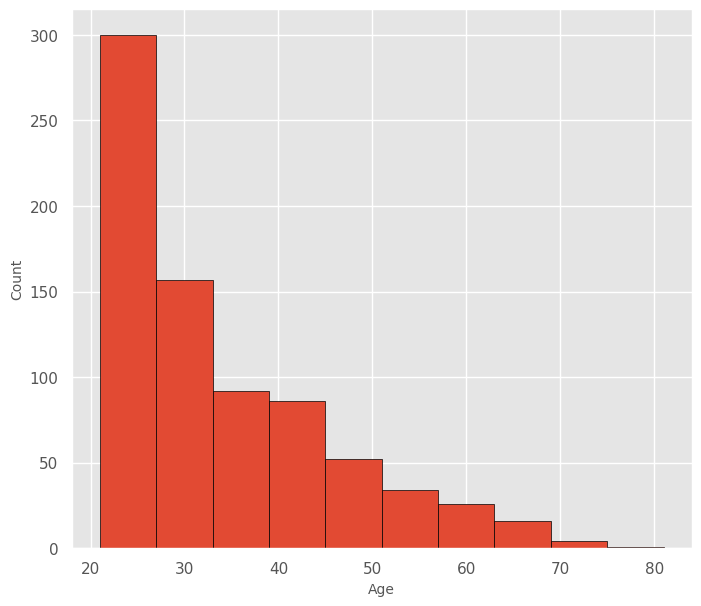

In [441]:
#plt of age using hist
plt.figure( figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
data['Age'].hist(edgecolor="black")

In [442]:
print("MAX AGE:"+str(data['Age'].max()))
print("MIN AGE:"+str(data['Age'].min()))

MAX AGE:81
MIN AGE:21


<ipython-input-443-1dc4647856bc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Pregnancies,bins=20, color="red",ax=ax[0,0])
<ipython-input-443-1dc4647856bc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Glucose,bins=20, color="red",ax=ax[0,1])
<ipython-input-443-1dc4647856bc>:5: 

<Axes: xlabel='Age', ylabel='Density'>

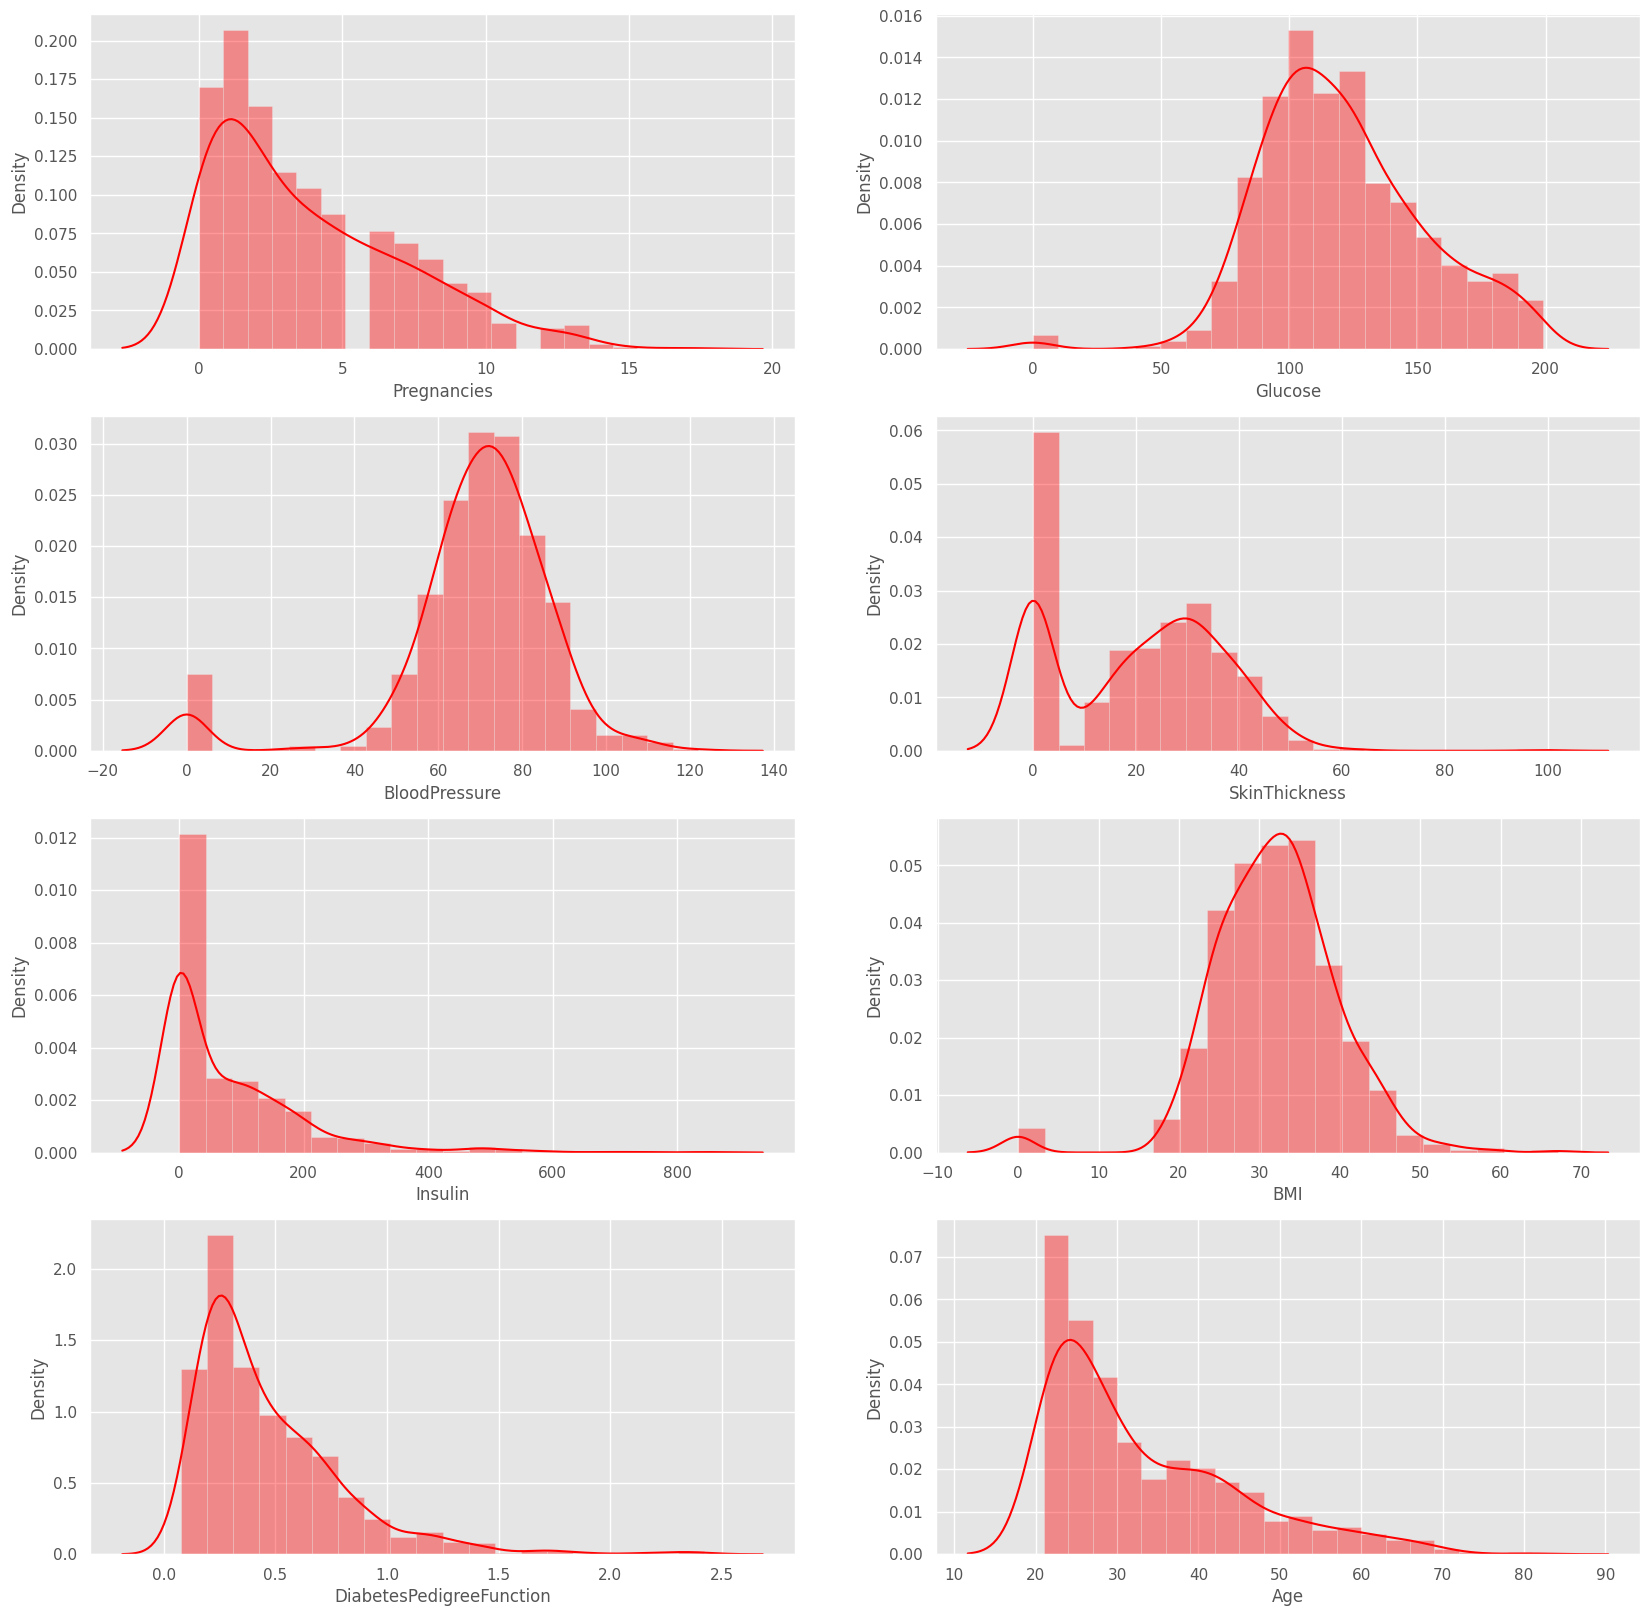

In [443]:
#density graph
fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.distplot(data.Pregnancies,bins=20, color="red",ax=ax[0,0])
sns.distplot(data.Glucose,bins=20, color="red",ax=ax[0,1])
sns.distplot(data.BloodPressure,bins=20, color="red",ax=ax[1,0])
sns.distplot(data.SkinThickness,bins=20, color="red",ax=ax[1,1])
sns.distplot(data.Insulin,bins=20, color="red",ax=ax[2,0])
sns.distplot(data.BMI,bins=20, color="red",ax=ax[2,1])
sns.distplot(data.DiabetesPedigreeFunction,bins=20, color="red",ax=ax[3,0])
sns.distplot(data.Age,bins=20, color="red",ax=ax[3,1])


In [444]:
data.groupby('Outcome').agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [445]:
data.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [446]:
data.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [447]:
data.groupby('Outcome').agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [448]:
data.groupby('Outcome').agg({'DiabetesPedigreeFunction':'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [449]:
data.groupby('Outcome').agg({'Age':'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


In [450]:
data.groupby('Outcome').agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [451]:
data.groupby('Outcome').agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [452]:
data.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


<ipython-input-453-dc50edf153e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, ax=ax[1], palette="pastel")


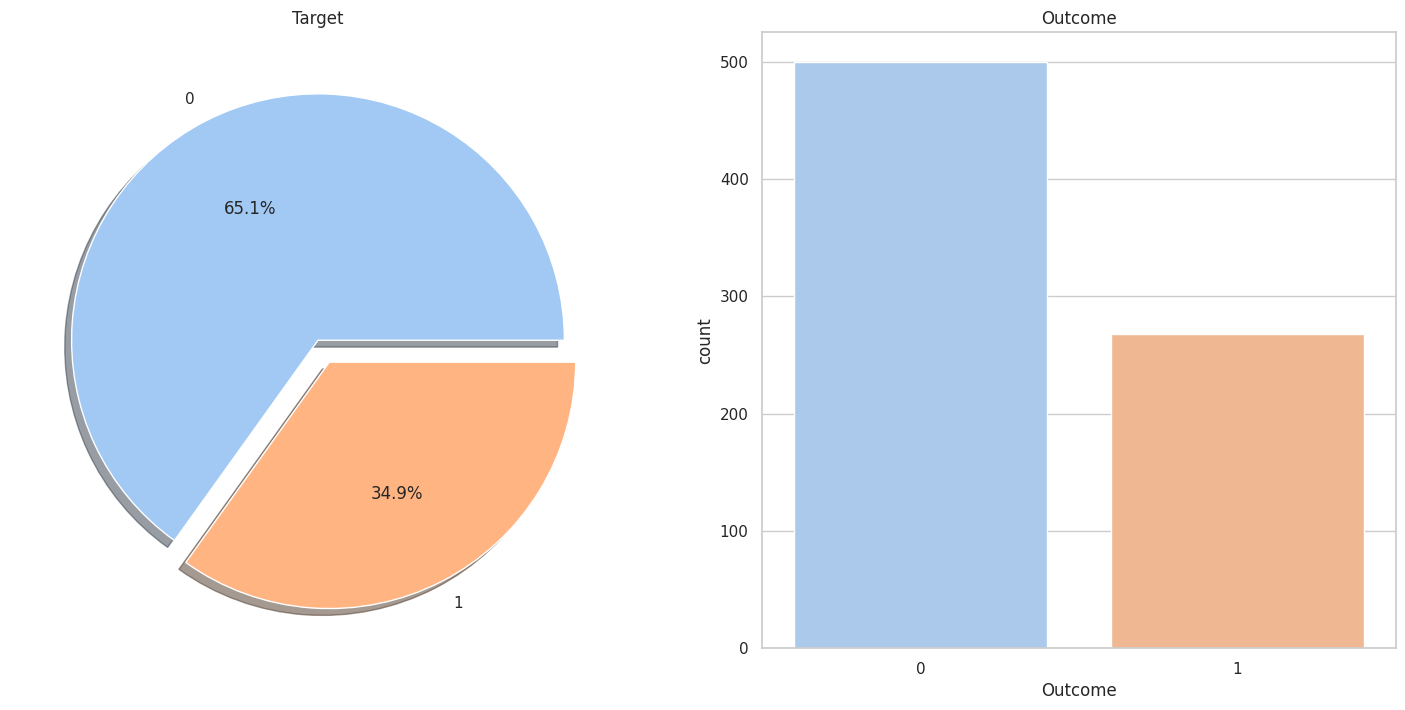

In [453]:
sns.set(style="whitegrid")

f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct="%1.1f%%",
    ax=ax[0],
    shadow=True,
    colors=sns.color_palette("pastel")
)
ax[0].set_title('Target')
ax[0].set_ylabel('')

sns.countplot(x='Outcome', data=data, ax=ax[1], palette="pastel")
ax[1].set_title('Outcome')

plt.show()


In [454]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


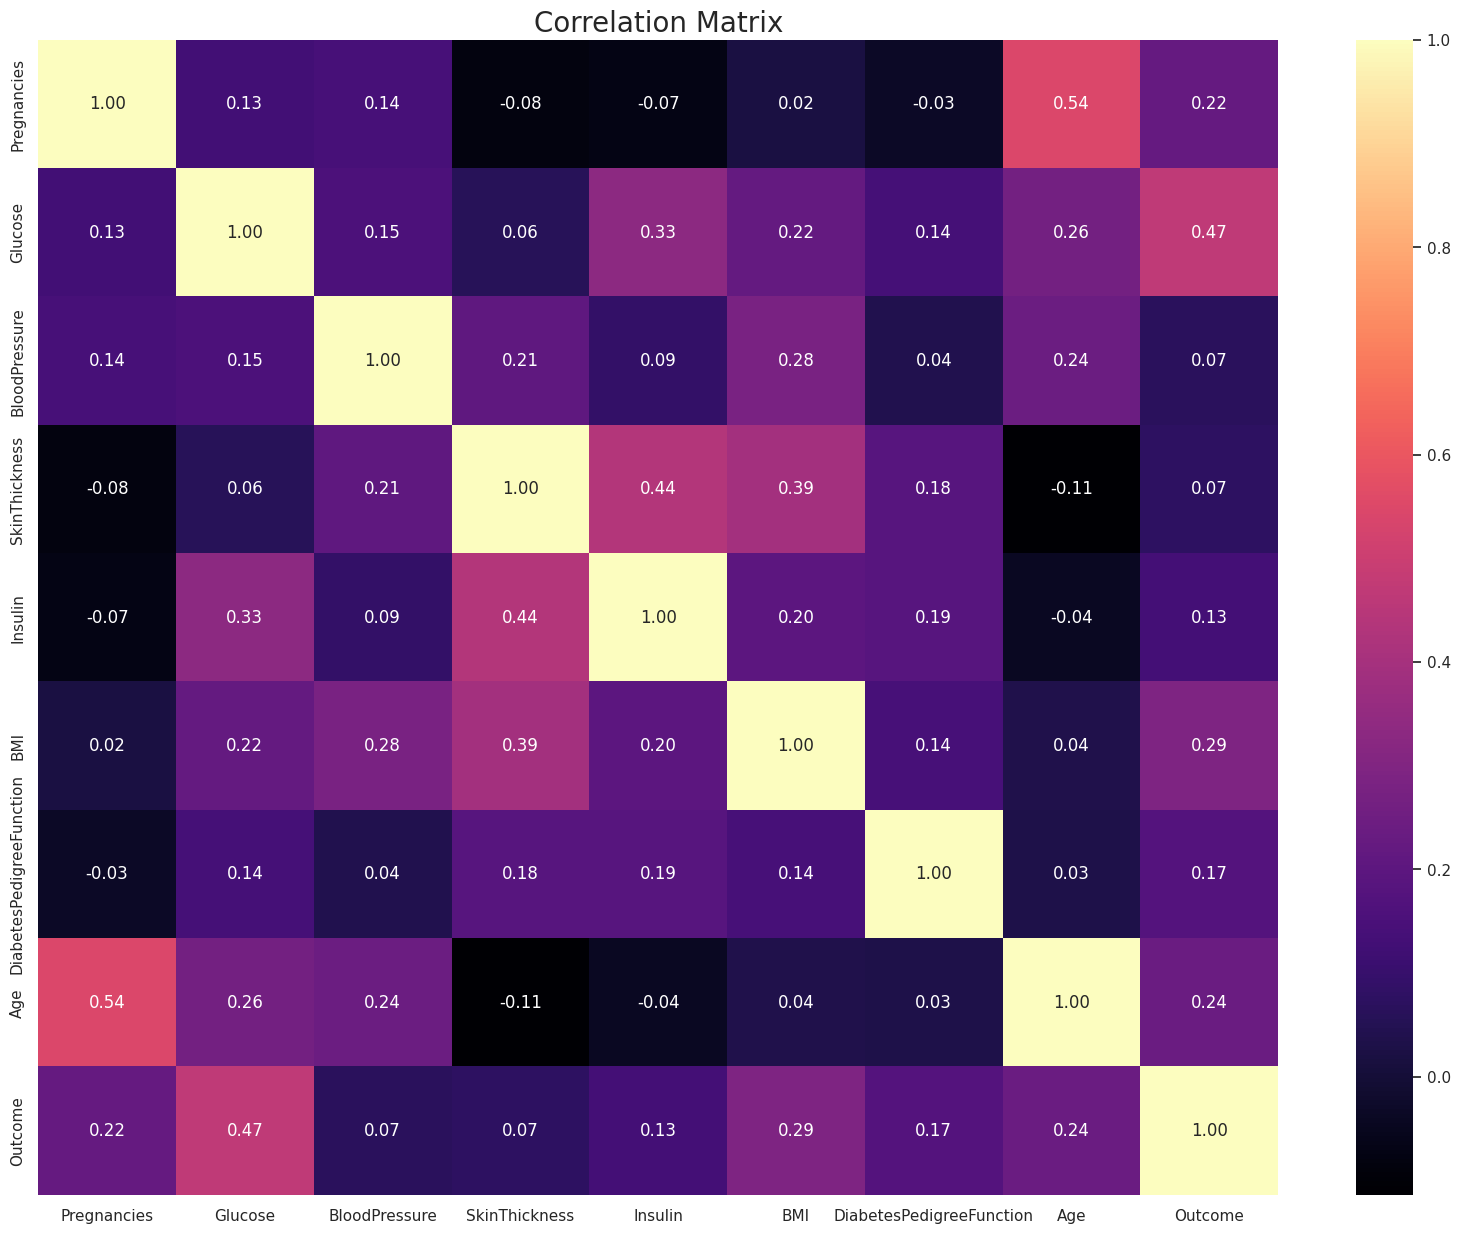

In [455]:
f,ax=plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(),annot=True ,fmt=".2f",ax=ax,cmap="magma")
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

In [456]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [457]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [458]:
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)

In [459]:
data.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

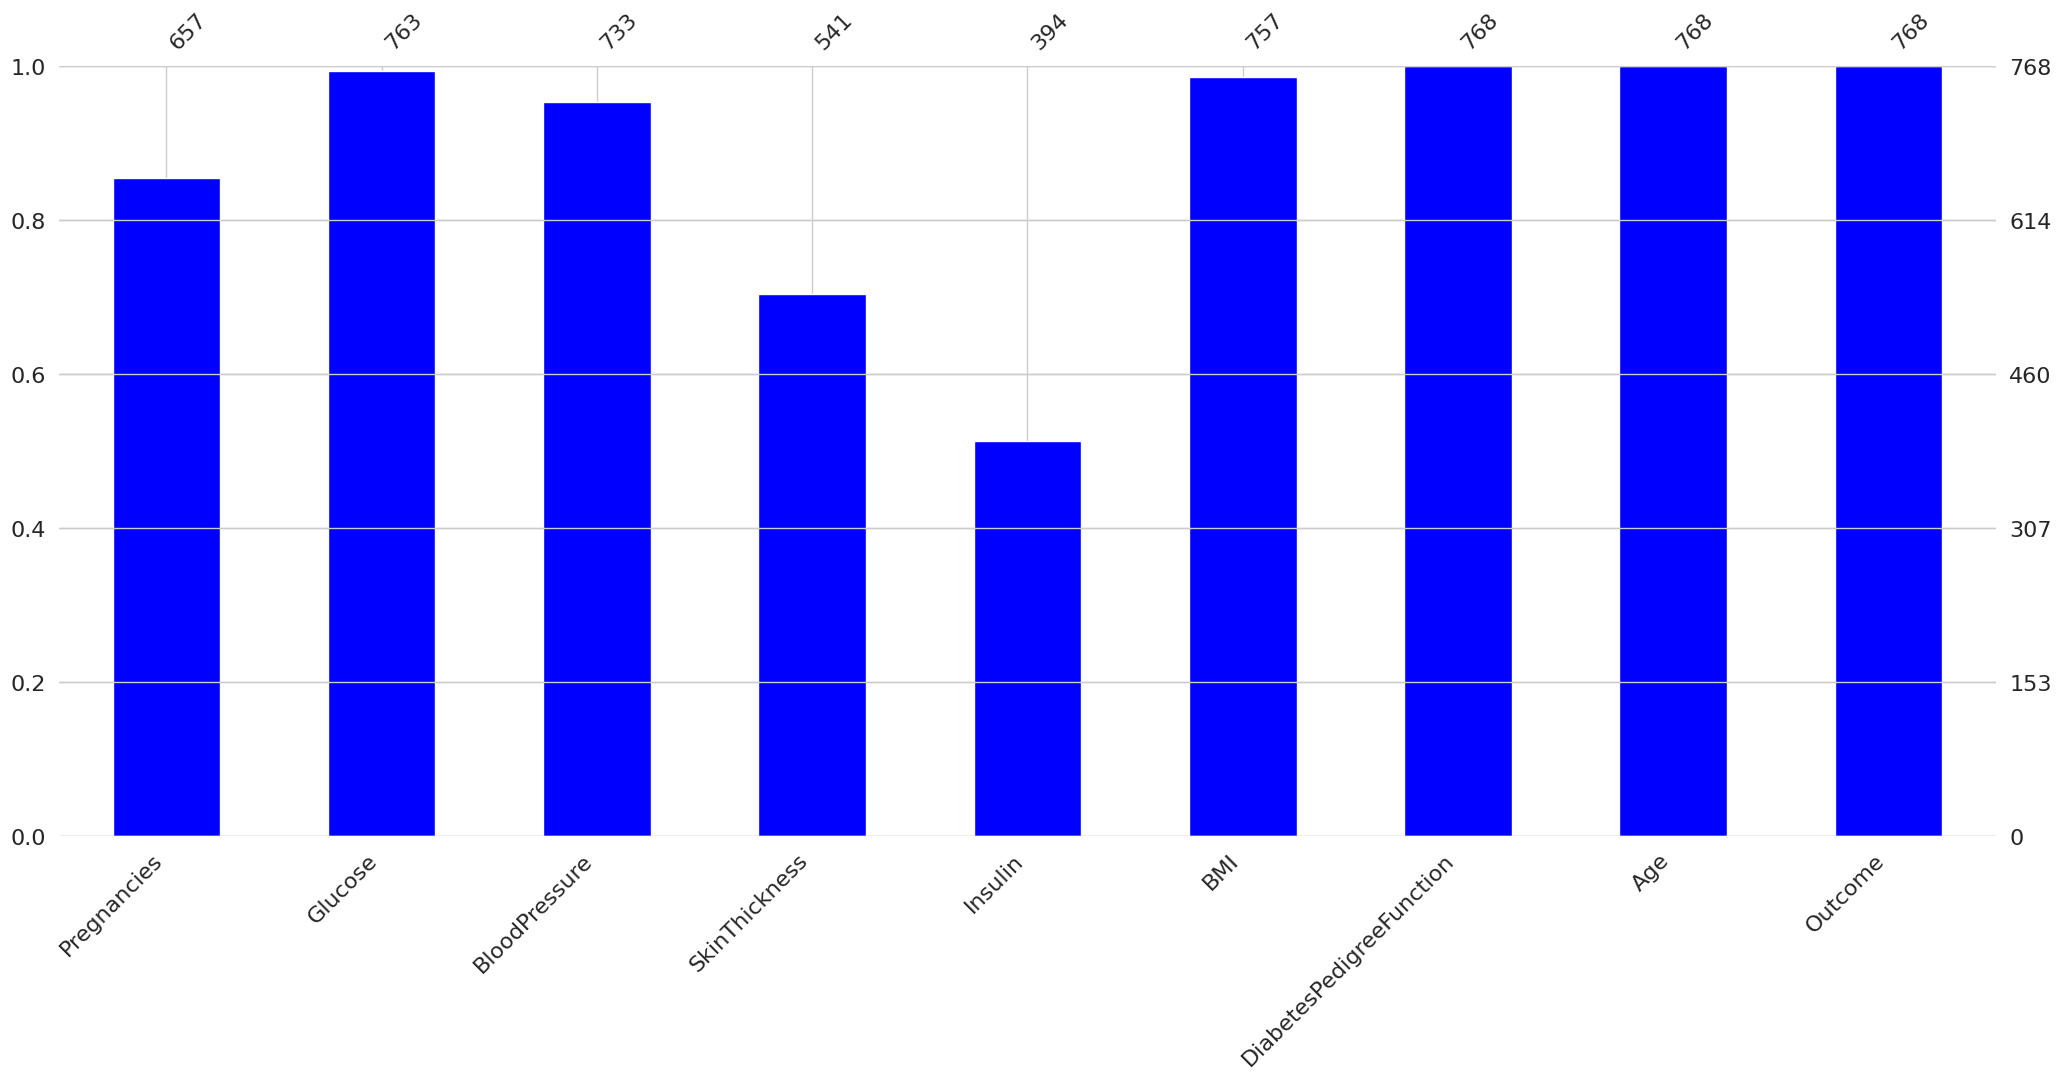

In [460]:
import missingno as msno
msno.bar(data,color="blue")

In [461]:
def median_target(var):
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

col = data.columns
colo = col.drop('Outcome')
for i in colo:
    median_values = median_target(i)
    print(median_values)


    median_0 = median_values.loc[median_values['Outcome'] == 0, i].values[0]
    median_1 = median_values.loc[median_values['Outcome'] == 1, i].values[0]


    data.loc[(data['Outcome'] == 0) & (data[i].isnull()), i] = median_0
    data.loc[(data['Outcome'] == 1) & (data[i].isnull()), i] = median_1

print(data.head())


   Outcome  Pregnancies
0        0          3.0
1        1          5.0
   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.449
   Outcome   Age
0        0  27.0
1        1  36.0
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   Dia

In [462]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [463]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


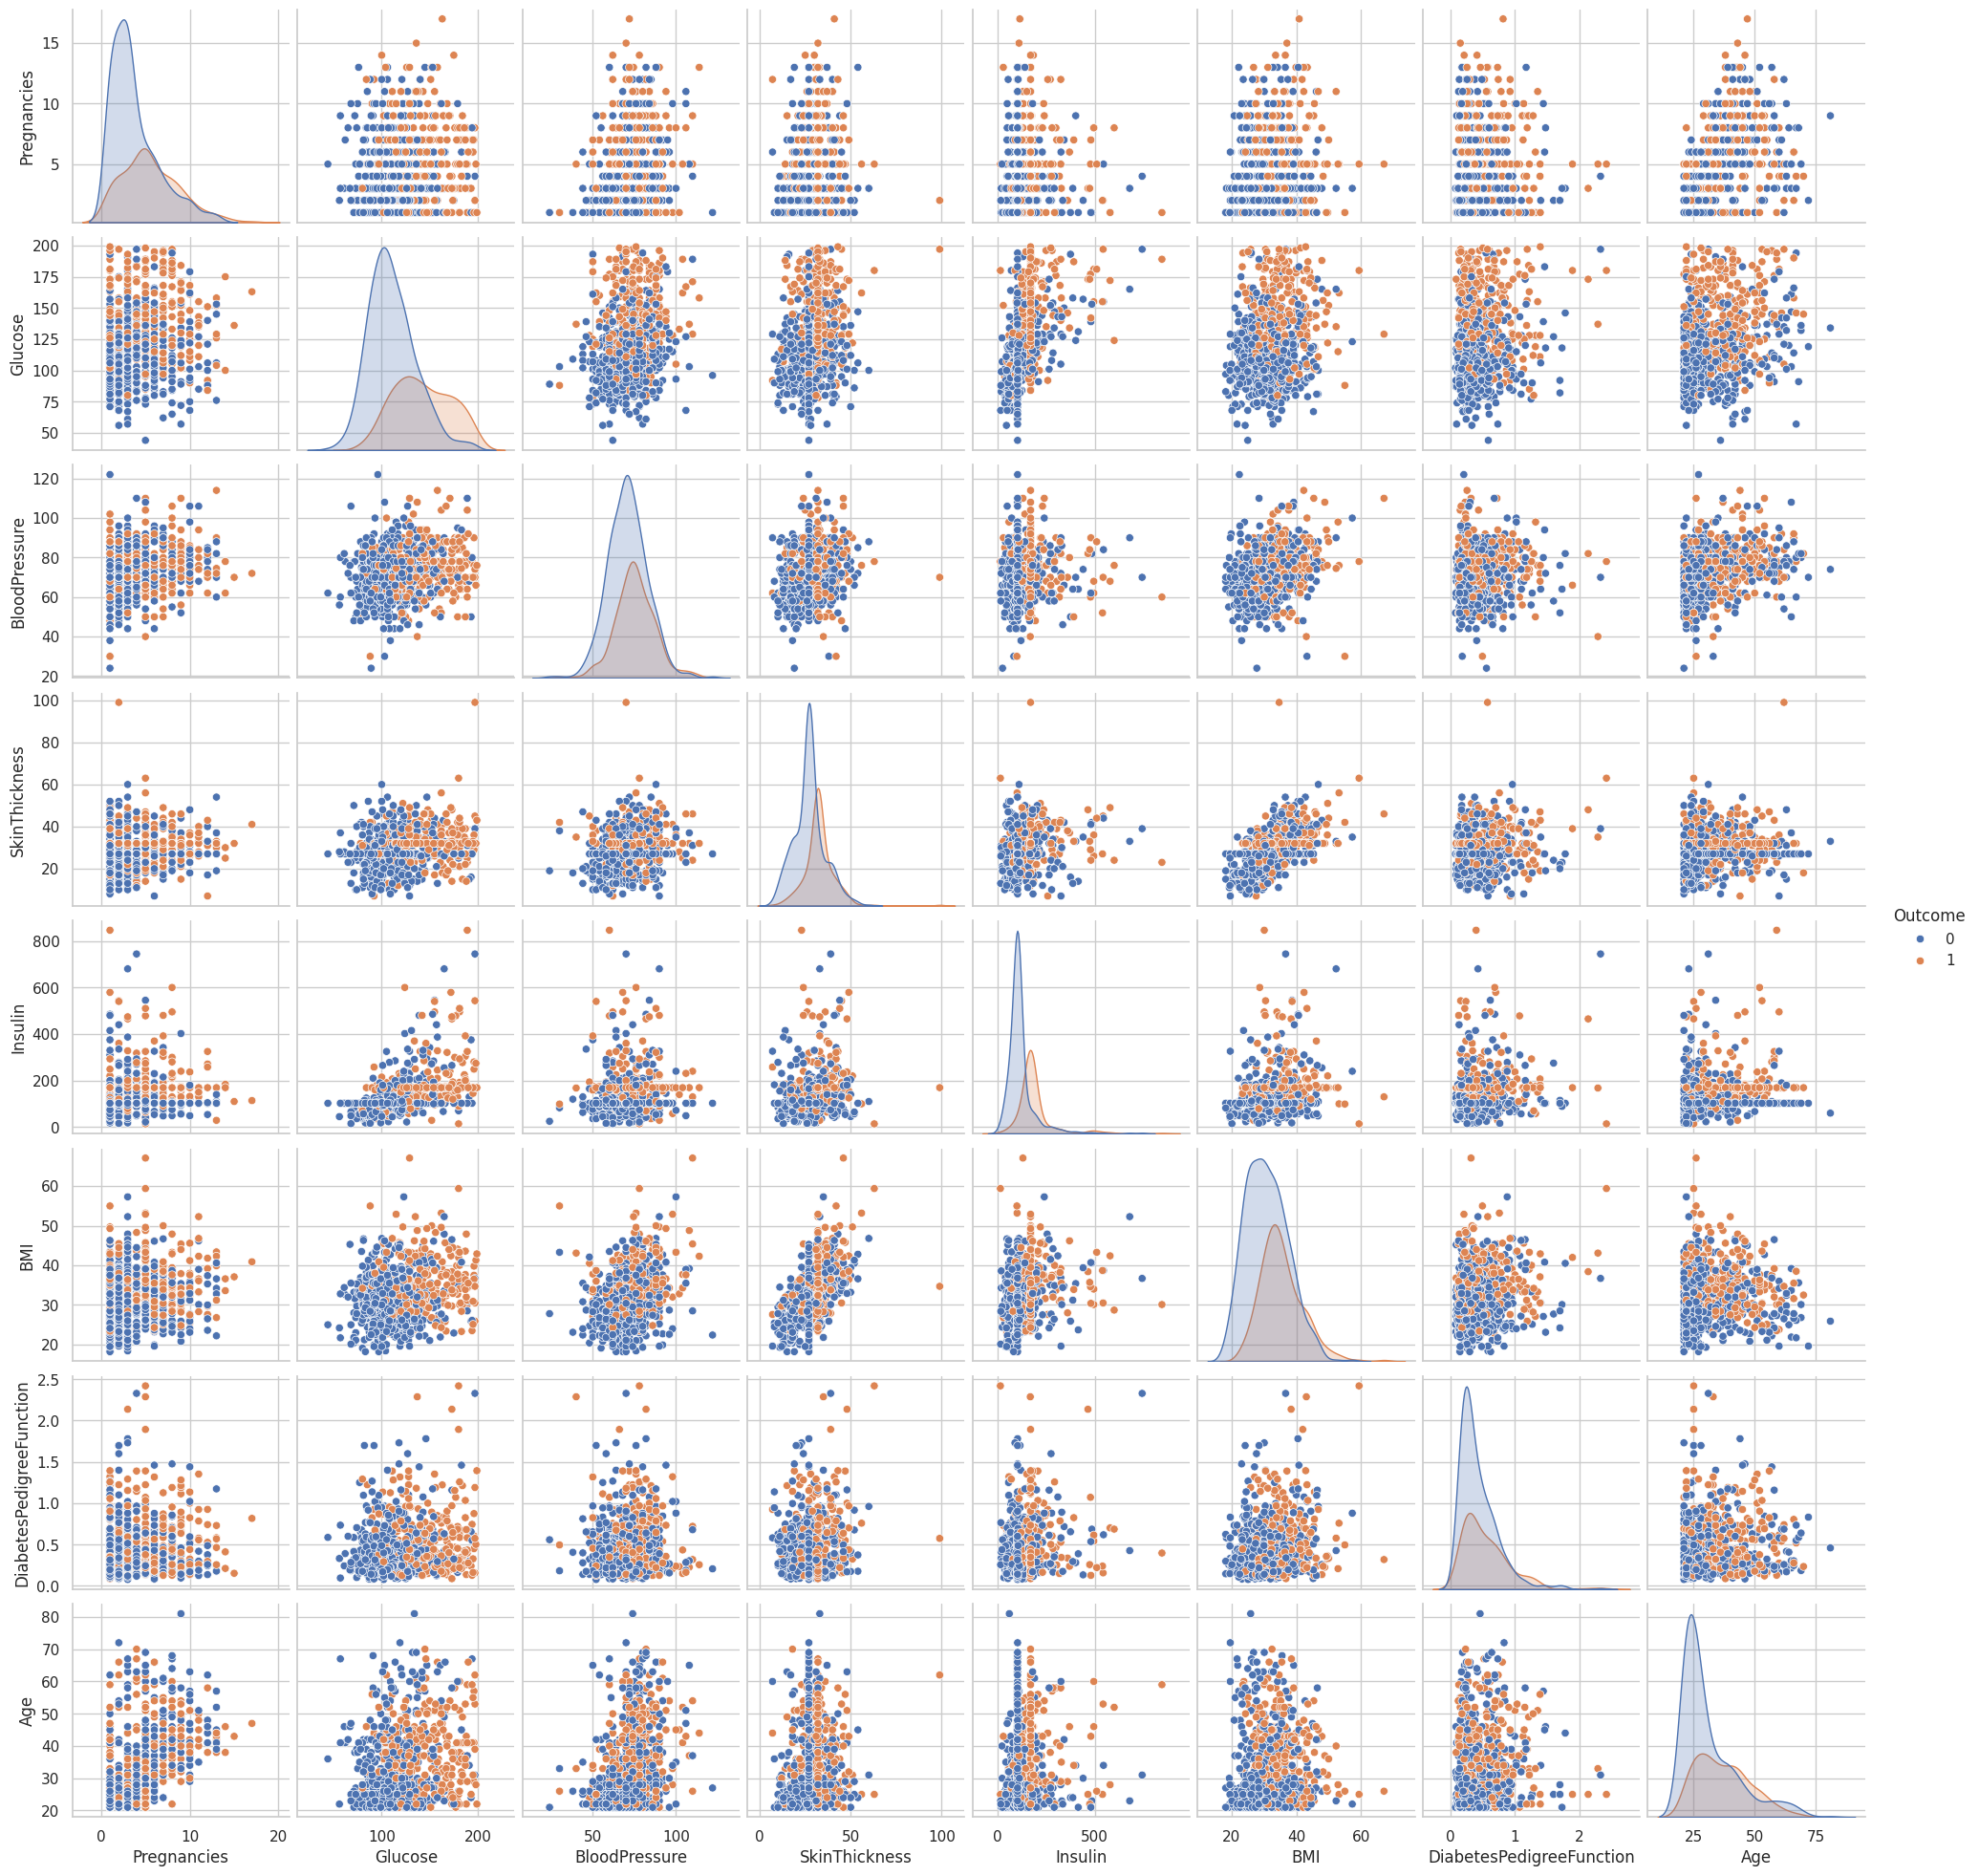

In [464]:
p=sns.pairplot(data,hue="Outcome")

In [465]:
for features in data:
  Q1=data[features].quantile(0.25)
  Q3=data[features].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  if data[(data[features]>upper)].any(axis=None):
    print (features,"yes")
  else:
    print(features,"no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

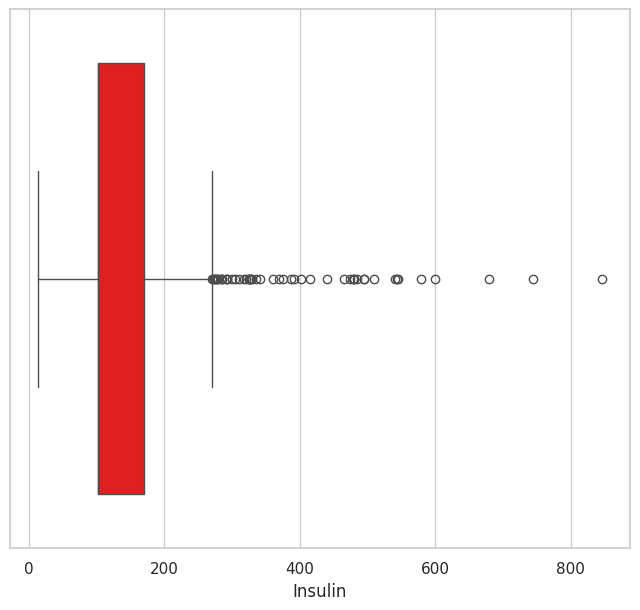

In [466]:
plt.figure(figsize=(8,7))
sns.boxplot(x=data['Insulin'],color="red")

In [467]:
Q1=data.Insulin.quantile(0.25)
Q3=data.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
data.loc[data['Insulin']>upper,"Insulin"]=upper

<Axes: xlabel='Insulin'>

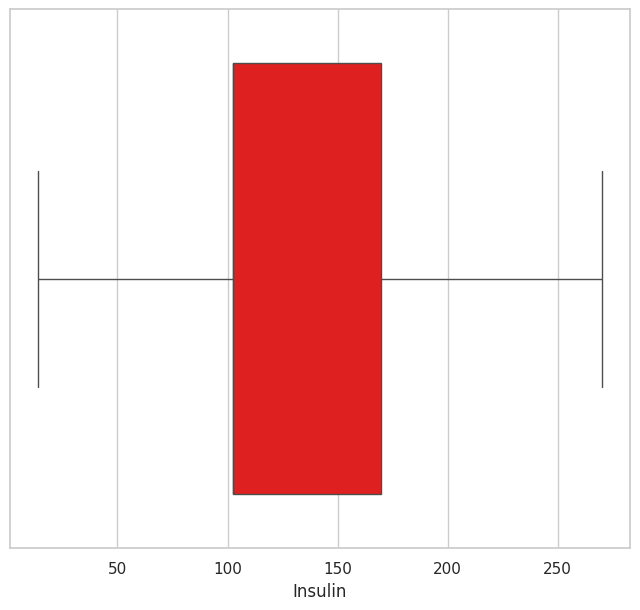

In [468]:
plt.figure(figsize=(8,7))
sns.boxplot(x=data['Insulin'],color="red")

In [469]:
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [470]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

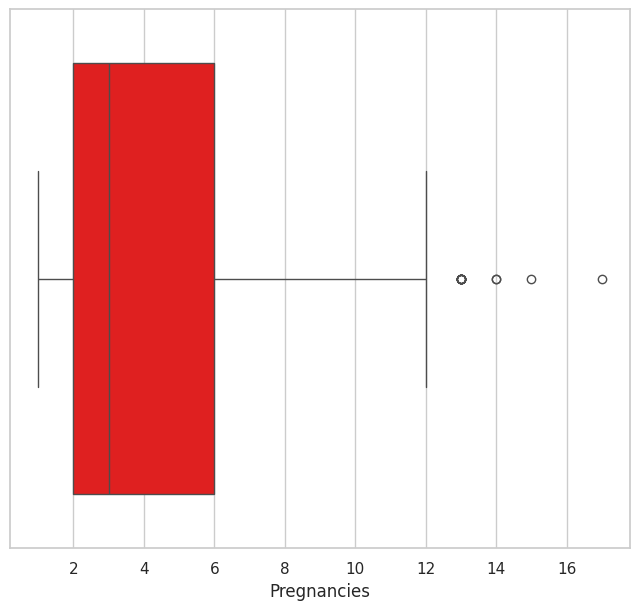

In [471]:
plt.figure(figsize=(8,7))
sns.boxplot(x=data['Pregnancies'],color="red")

In [472]:
data_scores=lof.negative_outlier_factor_
np.sort(data_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [473]:
threshold=np.sort(data_scores)[7]

In [474]:
print(threshold)

-1.7497423670960557


In [475]:
outlier=data_scores>threshold

In [476]:
data=data[outlier]

In [477]:
data.shape


(760, 9)

In [478]:
data['BMI'].value_counts()

,count
BMI,
30.1,18
32.0,13
31.2,12
31.6,12
32.4,10
...,...
45.2,1
36.7,1
41.8,1


In [479]:
NewBMI=pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype="category")

In [480]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [481]:
data['NewBMI']=NewBMI
data.loc[data["BMI"]<18.5, "NewBMI"]= NewBMI[0]
data.loc[(data["BMI"]>18.5)&(data['BMI']<24.9),"NewBMI"]=NewBMI[1]
data.loc[(data["BMI"]>24.9)&(data['BMI']<29.9),"NewBMI"]=NewBMI[2]
data.loc[(data["BMI"]>29.9)&(data['BMI']<34.9),"NewBMI"]=NewBMI[3]
data.loc[(data["BMI"]>34.9)&(data['BMI']<39.9),"NewBMI"]=NewBMI[4]
data.loc[(data["BMI"]<39.9),"NewBMI"]=NewBMI[5]


<ipython-input-481-5457df4a7ebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NewBMI']=NewBMI


In [482]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2


In [483]:
def set_insulin(row):
  if row['Insulin']>16 and row['Insulin']<166 :
    return "Normal"
  else:
    return "Abnormal"


In [484]:
data= data.assign(NewInsulin=data.apply(set_insulin,axis=1))

In [485]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2,Abnormal


In [486]:
NewGlucose=pd.Series(["Low","Normal","Overweight","secret","high"],dtype="category")
data['NewGlucose']=NewGlucose
data.loc[(data["Glucose"]<=70), "NewGlucose"]= NewGlucose[0]
data.loc[(data["Glucose"]>70)&(data['Glucose']<99),"NewGlucose"]=NewGlucose[1]
data.loc[(data["Glucose"]>99)&(data['Glucose']<126),"NewGlucose"]=NewGlucose[2]
data.loc[data["Glucose"]>126,"NewGlucose"]=NewGlucose[3]



In [487]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 3,Abnormal,secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 3,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 3,Abnormal,secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 3,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 2,Abnormal,secret


In [488]:
data=pd.get_dummies(data,columns=["NewBMI","NewInsulin","NewGlucose"],drop_first=True,dtype=int)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_high,NewGlucose_secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,0,1,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,1,0,0,1,1,0,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,1,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,1,0,0,1,1,0,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,1,0,0,0,0,0,0,0,1


In [489]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulin_Normal', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_high', 'NewGlucose_secret'],
      dtype='object')

In [490]:
categorical_data=data[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulin_Normal', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_high', 'NewGlucose_secret']]

In [491]:
categorical_data.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_high,NewGlucose_secret
0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,0,0,1,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,1


In [492]:
y=data['Outcome']
X=data.drop(['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulin_Normal', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_high', 'NewGlucose_secret','Outcome'],axis=1)

In [493]:
cols=X.columns
index=X.index

In [494]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [495]:
from sklearn.preprocessing import RobustScaler
transformer= RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X,columns=cols,index=index)

In [496]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [497]:
X=pd.concat([X,categorical_data],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulin_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_high,NewGlucose_secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,0,0,1,0,0,0,0,0,0,1
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,0,0,1,0,0,1,1,0,0,0
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,0,0,1,0,0,0,0,0,0,1
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,0,0,1,0,0,1,1,0,0,0
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,0,1,0,0,0,0,0,0,0,1


In [498]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [499]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [500]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [501]:
y_pred=lr.predict(X_test)

In [502]:
accuracy_score(y_train,lr.predict(X_train))

0.8486842105263158

In [503]:
accuracy_score(y_test,lr.predict(X_test))

0.9078947368421053

In [504]:
confusion_matrix(y_test,y_pred)

array([[90,  8],
       [ 6, 48]])

In [507]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [509]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(y_train,knn.predict(X_train)))
print(accuracy_score(y_test,knn.predict(X_test)))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.875
0.881578947368421
Confusion Matrix [[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [512]:
svc=SVC(probability=True)
parameter={
    "gamma":[0.0001,0.001,0.01,0.1],
    "C":[0.01,0.05,0.01,0.1,1,10,15,20]

}
grid_search=GridSearchCV(svc,parameter)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.01, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [513]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [514]:
grid_search.best_score_

0.8552364178295623

In [515]:
svc=SVC(C=15,gamma=0.01, probability =True)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(y_train,svc.predict(X_train)))
print(accuracy_score(y_test,svc.predict(X_test)))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8782894736842105
0.9210526315789473
Confusion Matrix [[92  6]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        98
           1       0.89      0.89      0.89        54

    accuracy                           0.92       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.92      0.92      0.92       152



In [517]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_train,dt.predict(X_train)))
print(accuracy_score(y_test,dt.predict(X_test)))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
0.8618421052631579
Confusion Matrix [[85 13]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        98
           1       0.78      0.85      0.81        54

    accuracy                           0.86       152
   macro avg       0.85      0.86      0.85       152
weighted avg       0.87      0.86      0.86       152



In [ ]:
#hyperparameter tuning of dt since training accuracy is shown as 1

In [518]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt=GridSearchCV(dt,grid_param,cv=50,n_jobs=-1,verbose=1)
grid_search_dt.fit(X_train,y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
28000 fits failed out of a total of 60000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10013 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [519]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [520]:
grid_search_dt.best_score_

0.8797435897435898

In [523]:
dt=grid_search_dt.best_estimator_
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_train,dt.predict(X_train)))
print(accuracy_score(y_test,dt.predict(X_test)))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9095394736842105
0.875
Confusion Matrix [[89  9]
 [10 44]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        98
           1       0.83      0.81      0.82        54

    accuracy                           0.88       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.87      0.88      0.87       152



In [525]:
rand_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=15,
    max_features=0.75,
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130
)

rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [526]:
y_pred=rand_clf.predict(X_test)
print(accuracy_score(y_train,rand_clf.predict(X_train)))
print(accuracy_score(y_test,rand_clf.predict(X_test)))
print("Confusion Matrix",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9950657894736842
0.9078947368421053
Confusion Matrix [[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152

